In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 
Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library. Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.


In [82]:
from sklearn import datasets, mixture, metrics
import matplotlib.cm as cm

In [106]:
def plot_gmm(X):
    for n_components in range(2,6,1):
        gmm = mixture.GaussianMixture(n_components=n_components)
        y_predict = gmm.fit_predict(X)
        # print(y_predict)
        print('n = ', n_components)

        plt.scatter(X[:, 0], X[:, 1], color=colors[y_predict])
        plt.show()

In [107]:
from scipy.spatial.distance import cdist
def elbow(dataset, K=10):
    losses = []
    for i in range(2, K):
        gmm = mixture.GaussianMixture(n_components=i)
        gmm.fit(dataset)
        # 2. Tính _hàm biến dạng_
        # 2.1. Khoảng cách tới toàn bộ centroids
        d2centroids = cdist(dataset, gmm.means_, 'euclidean') # shape (n, k)
        # 2.2. Khoảng cách tới centroid gần nhất
        min_distance = np.min(d2centroids, axis=1) # shape (n)
        loss = np.sum(min_distance)
        losses.append(loss)
    return losses





In [108]:
def Silhouette_score(dataset, K=10):
    scores = []
    for i in range(2, K):
        gmm = mixture.GaussianMixture(n_components=i)
        gmm.fit(dataset)
        score = metrics.silhouette_score(dataset, gmm.predict(dataset))

        scores.append(score)
    return scores


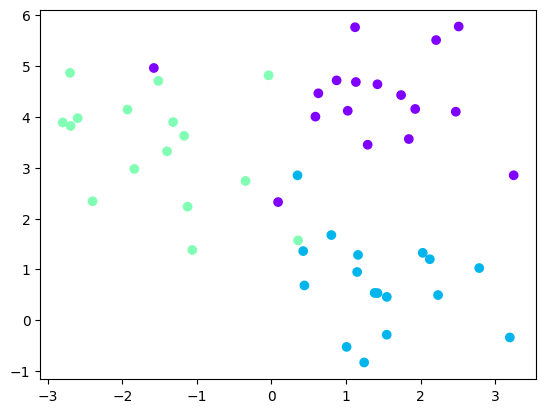

In [109]:
# Dataset 1:

n_labels = 3
X1, y1 = datasets.make_blobs(n_samples=50, centers=n_labels, n_features=2,
                 random_state=0)
                 
colors = cm.rainbow(np.linspace(0, 1, 5))

plt.scatter(X1[:, 0], X1[:, 1], color=colors[y1])  # original
plt.show()

n =  2


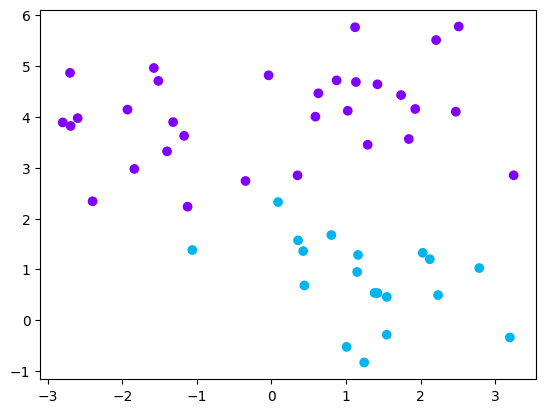

n =  3


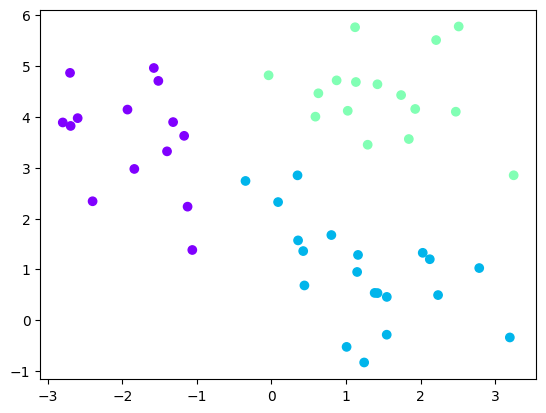

n =  4


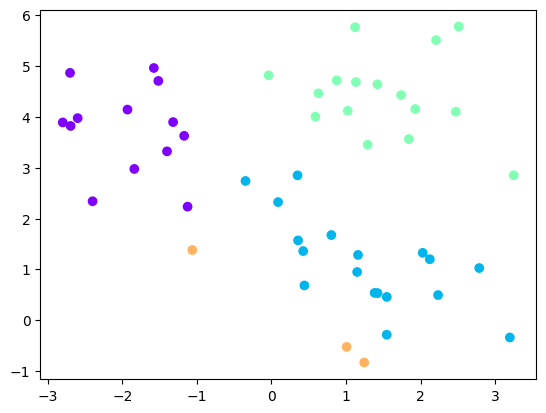

n =  5


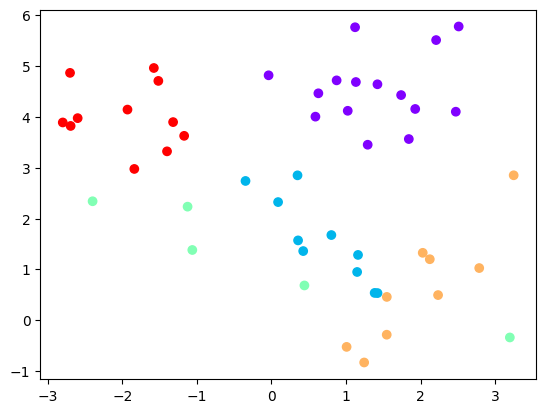

In [110]:
# predict
plot_gmm(X1)

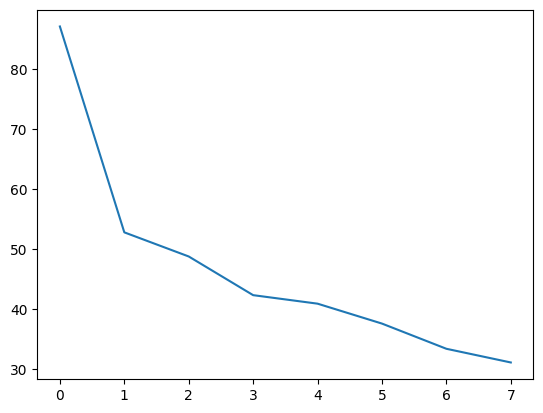

In [111]:
plt.plot(elbow(dataset=X1))


[0.3773391720220953, 0.5332491148470759, 0.47483528303481004, 0.3018831942706682, 0.3951827308530176, 0.3245239293368681, 0.2855841615418573, 0.3169426311245314]


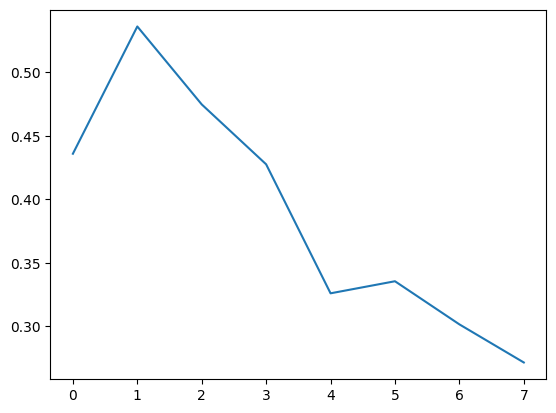

In [112]:
print(Silhouette_score(X1))
plt.plot(Silhouette_score(X1))

-> Chọn k = 3

## 3 
Compare kmeans and GMM (cons and pros)


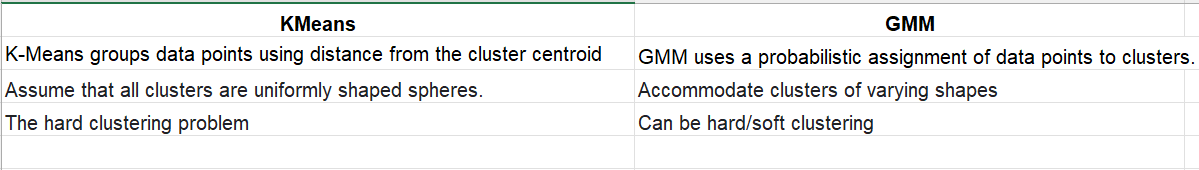

Find 3 examples that GMM is better than kmeans

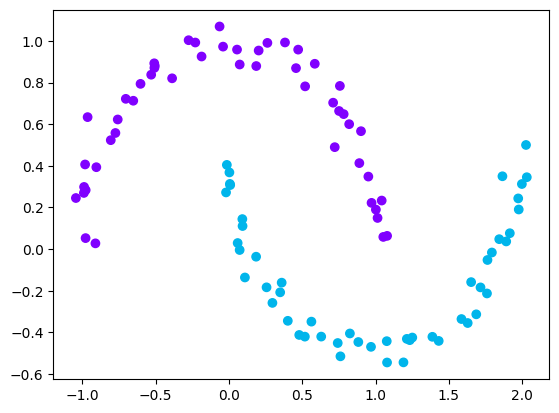

In [113]:
# Dataset 2:

X2, y2 = datasets.make_moons(noise=0.05)
colors = cm.rainbow(np.linspace(0, 1, 5))

plt.scatter(X2[:, 0], X2[:, 1], color=colors[y2])  # original
plt.show()

n =  2


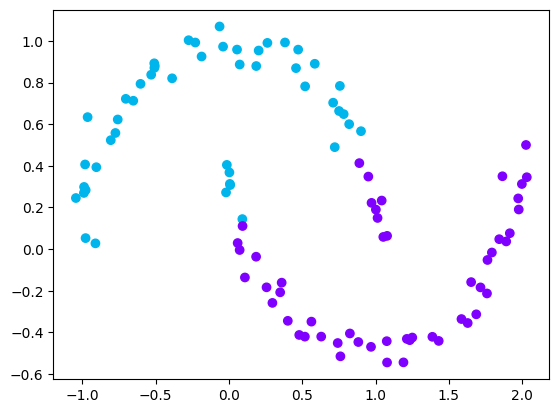

n =  3


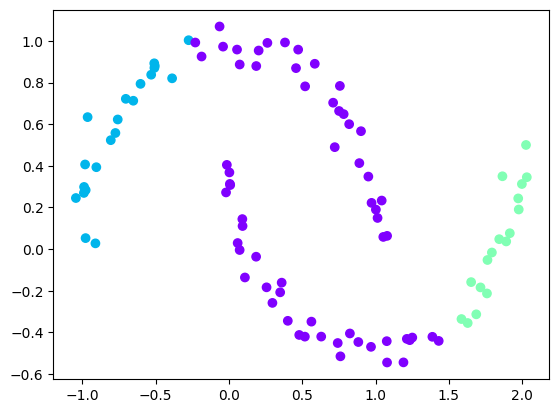

n =  4


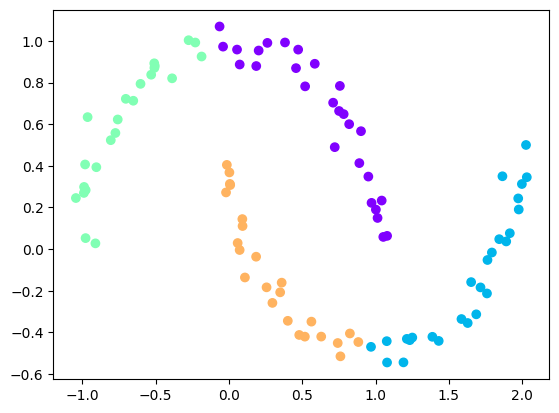

n =  5


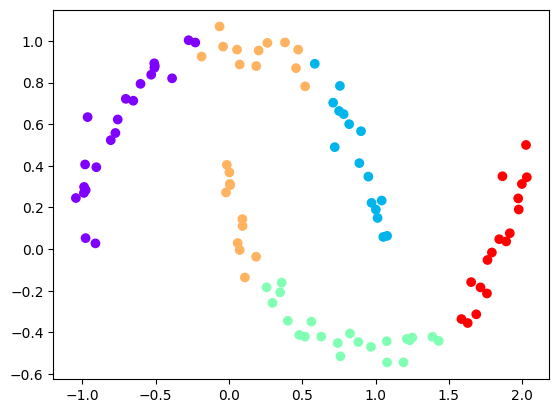

In [114]:
# predict
plot_gmm(X2)

In [116]:
from sklearn import cluster
def plot_kmeans(X):
    for n_components in range(2,6,1):
        kmeans = cluster.KMeans(n_clusters=n_components)
        y_predict = kmeans.fit_predict(X)
        # print(y_predict)
        print('n = ', n_components)

        plt.scatter(X[:, 0], X[:, 1], color=colors[y_predict])
        plt.show()

c:\Users\Admin\Downloads\References\22-23-1\Ml2\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n =  2


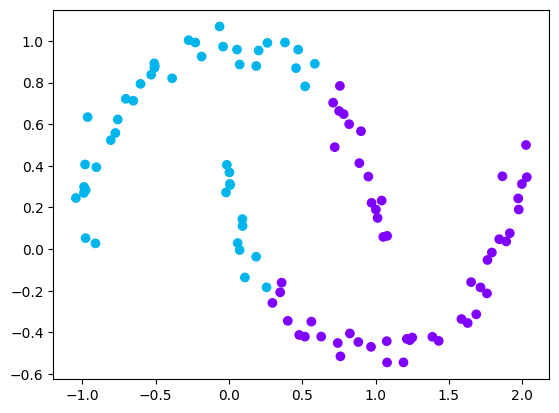

c:\Users\Admin\Downloads\References\22-23-1\Ml2\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n =  3


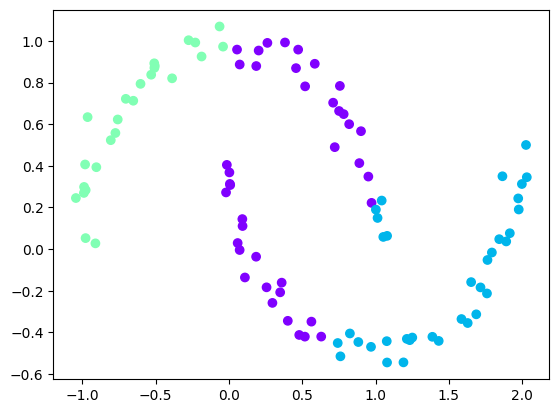

c:\Users\Admin\Downloads\References\22-23-1\Ml2\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n =  4


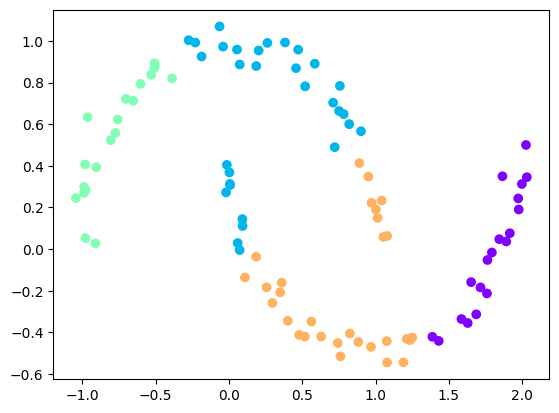

c:\Users\Admin\Downloads\References\22-23-1\Ml2\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n =  5


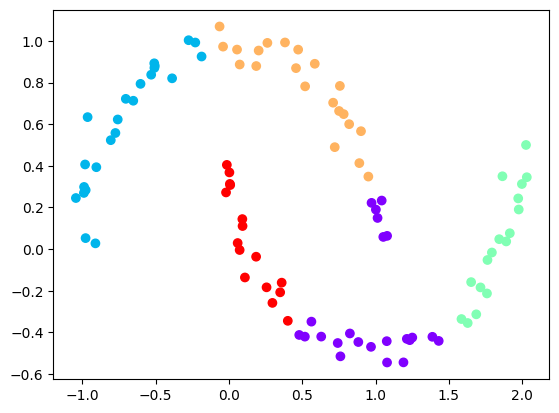

In [117]:
plot_kmeans(X2)